# API to extract data from Tiingo to: US stock data, Forex and cryptocurrencies

*2S by SRS*

Date: 2024-02-26


exporting data of https://app.tiingo.com/

site: https://www.tiingo.com/

In [1]:
# Installing libraries
!pip install tiingo


In [18]:
# importing libraries
from tiingo import TiingoClient
import pandas as pd
import matplotlib.pyplot as plt
import requests


In [21]:
# Key of Tiingo
api_key = '0f07c448233a7ebf338f6f2f99cdf53f511d5e83'


config = {
    'api_key': api_key,
    'session': True
}

client = TiingoClient(config)

In [36]:
# Searching metadata for a specific ticker
client.get_ticker_metadata('VALE')


{'ticker': 'VALE',
 'name': 'Vale S.A.',
 'description': 'Vale S.A., together with its subsidiaries, engages in the research, production, and sale of iron ore and pellets, nickel, fertilizer, copper, coal, manganese, ferroalloys, cobalt, platinum group metals, and precious metals in Brazil and internationally. Its Bulk Material segment produces and extracts iron ore and pellet. This segment is also involved in the production and extraction of manganese, ferroalloys, and others ferrous products and services; and extraction of coal, as well as in the provision of railroad, port, and terminal logistics services. The company\x92s Base Metals segment produces and extracts non-ferrous minerals, including nickel and copper. Its Fertilizers segment provides a group of nutrients, such as potash, phosphates, and nitrogen. The company also invests in energy generation through operating hydroelectric plants and centers, as well as produces steel. The company was formerly known as Companhia Vale do

In [39]:
# Searching for quotes for a specific ticker

price = client.get_ticker_price('VALE',
                                fmt = 'json',
                                startDate ='2023-01-01',
                                endDate = '2024-02-28',
                                frequency = "daily")

df_work = pd.DataFrame(price)
df_work.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
285,2024-02-22T00:00:00.000Z,13.51,13.6157,13.480,13.580,33413148,13.51,13.6157,13.480,13.580,33413148,0.0,1.0
286,2024-02-23T00:00:00.000Z,13.47,13.7600,13.445,13.750,27600510,13.47,13.7600,13.445,13.750,27600510,0.0,1.0
287,2024-02-26T00:00:00.000Z,13.17,13.2700,13.090,13.260,27558175,13.17,13.2700,13.090,13.260,27558175,0.0,1.0
288,2024-02-27T00:00:00.000Z,13.62,13.6800,13.420,13.445,25506325,13.62,13.6800,13.420,13.445,25506325,0.0,1.0
289,2024-02-28T00:00:00.000Z,13.37,13.4900,13.340,13.490,21413550,13.37,13.4900,13.340,13.490,21413550,0.0,1.0


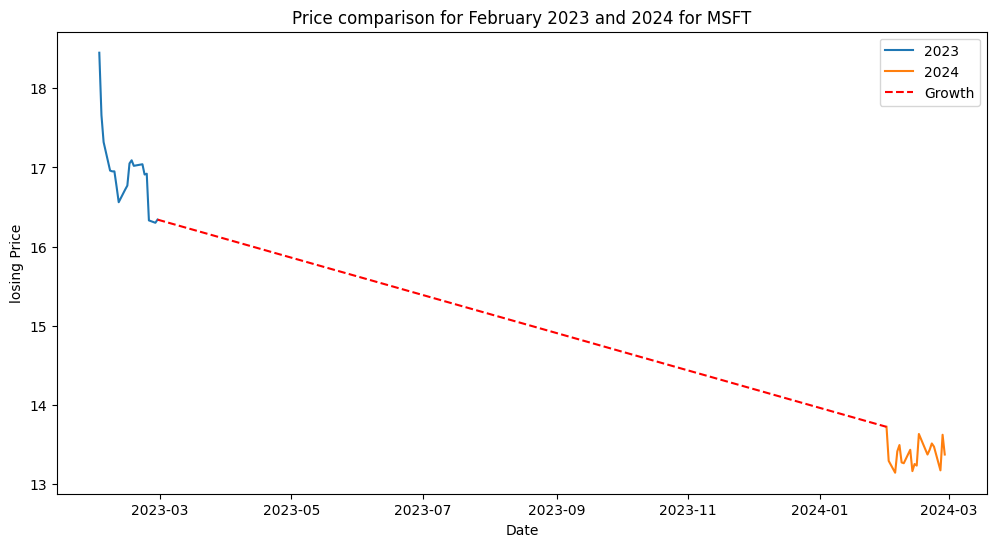

In [40]:
# Convert the 'date' column to datetime
df_work['date'] = pd.to_datetime(df_work['date'])

# Select the data to include only February 2023 and 2024
df_february = df_work[((df_work['date'] >= '2023-02-01') & (df_work['date'] <= '2023-02-28')) |
                       ((df_work['date'] >= '2024-02-01') & (df_work['date'] <= '2024-02-29'))]

# Create a graph comparing prices in February 2023 and 2024
plt.figure(figsize=(12, 6))
plt.plot(df_february[df_february['date'].dt.year == 2023]['date'], df_february[df_february['date'].dt.year == 2023]['close'], label='2023')
plt.plot(df_february[df_february['date'].dt.year == 2024]['date'], df_february[df_february['date'].dt.year == 2024]['close'], label='2024')

# Find the last value of 2023 and the first value of 2024
last_2023 = df_february[(df_february['date'].dt.year == 2023) & (df_february['date'].dt.month == 2)]['close'].iloc[-1]
first_2024 = df_february[(df_february['date'].dt.year == 2024) & (df_february['date'].dt.month == 2)]['close'].iloc[0]

# Draw a straight line between these two values
plt.plot([df_february[df_february['date'].dt.year == 2023]['date'].iloc[-1], df_february[df_february['date'].dt.year == 2024]['date'].iloc[0]],
         [last_2023, first_2024], 'r--', label='Growth')

plt.title('Price comparison for February 2023 and 2024 for MSFT')
plt.xlabel('Date')
plt.ylabel('losing Price')
plt.legend()
plt.show()


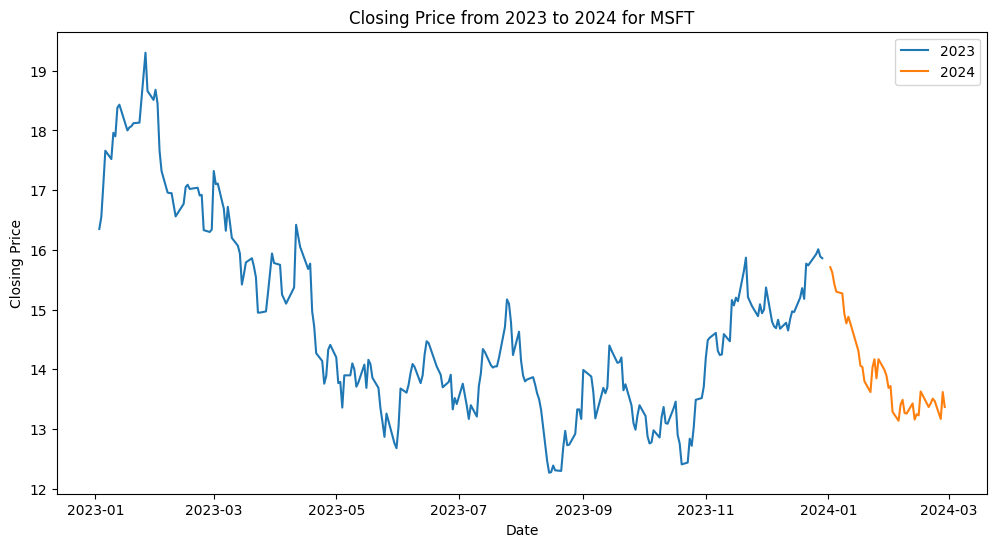

In [41]:

# Convert the 'date' column to datetime
df_work['date'] = pd.to_datetime(df_work['date'])

# Filter the data to include only data from 2023 and 2024
df_2023 = df_work[df_work['date'].dt.year == 2023]
df_2024 = df_work[df_work['date'].dt.year == 2024]

# Create a graph comparing prices in 2023 and 2024
plt.figure(figsize=(12, 6))
plt.plot(df_2023['date'], df_2023['close'], label='2023')
plt.plot(df_2024['date'], df_2024['close'], label='2024')
plt.title('Closing Price from 2023 to 2024 for MSFT')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


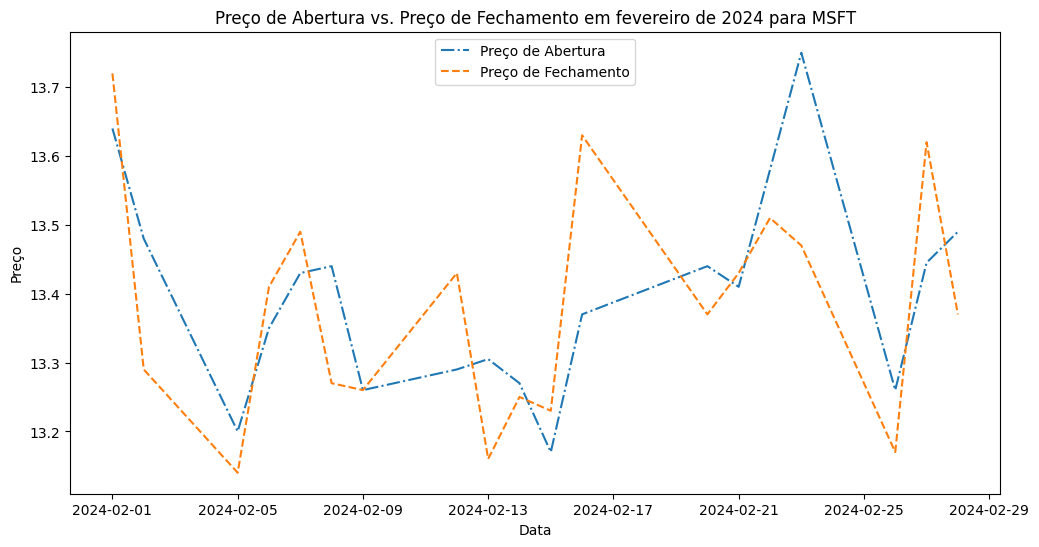

In [52]:



# Convert the 'date' column to datetime
df_work['date'] = pd.to_datetime(df_work['date'])

# Select the data to include only February 2024
df_february_2024 = df_work[(df_work['date'] >= '2024-02-01') & (df_work['date'] <= '2024-02-29')]

# Create a chart comparing the opening and closing prices in February 2024
plt.figure(figsize=(12, 6))
plt.plot(df_february_2024['date'], df_february_2024['open'], label='Preço de Abertura', linestyle='-.')
plt.plot(df_february_2024['date'], df_february_2024['close'], label='Preço de Fechamento', linestyle='--')

plt.title('Preço de Abertura vs. Preço de Fechamento em fevereiro de 2024 para MSFT')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()
